# Zeroth order approximation

The approximation for the zeroth order of the signal using a delta function as a source.

In [1]:
# Import libraries
from soundpy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib notebook

# Create Estimator
F = estimator(max_order=0, multiprocess = True, n_cores = 10)

Generating Estimator for order 0
Assembling the estimator using multiprocessing on 10 cores
Permuations created successfully
	Send the slow data to the pool
	Send the fast data to the pool
	Fast: 0, 0, 0 Done!
	Slow: 0, 0, 0 Done!
Pool closed Successfully
recasting functions


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Estimator Generated Successfully


<IPython.core.display.Javascript object>


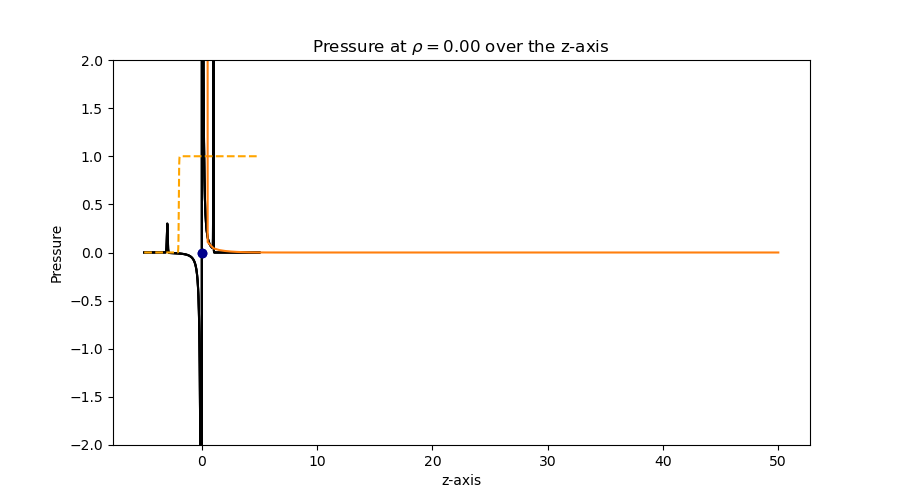

interactive(children=(FloatSlider(value=0.1, description='r', max=5.0, step=0.01), FloatSlider(value=1.0, desc…

In [2]:
# Set up a plot
fig = plt.figure(figsize=(9,5))
ax  = fig.add_subplot(111)

# Customization
z_lims  = (-5,5)
y_lims  = (-2,2)
# ax.set_xlim(*z_lims)
ax.set_ylim(*y_lims)
ax.set_xlabel('z-axis')
ax.set_ylabel('Pressure')
ax.set_title(r'Pressure at $\rho = 0.10$ over the z-axis')

# Data
N_pts   = 1000
z       = np.linspace(*z_lims,N_pts)
T_lims  = (0,5)
Z       = 4
T       = np.linspace(*T_lims,N_pts)

# Widgets and updating
@widgets.interact(r=(0,5,0.01),t=(0,10,0.1),v=(0,3,0.01),lamda=(0,1,0.001),a=(0,100,1),s=(-10,10,0.1))
def update(r=0.1,t=1,v=1.5,lamda=0.1,a=5,s=1):
    [l.remove() for l in ax.lines]
    
    ax.set_title(r'Pressure at $\rho = %4.2f$ over the z-axis'%r)
    ax.plot(z, F(r,z,t,v,lamda,a,s), color='k')
    ax.plot(z,1/(1+np.exp(-a*(z - s))), ls='--',c='orange')
    ax.plot([v*t],[0],marker='o',c='darkblue')


In [2]:
# Find the maximum over z at some point in time
def get_max(r:float=0,t:float=0,v:float=0.5,a:float=1,s:float=-2,N_pts:int=1000):
    # get the z axis for this:
    z_lims = (-20*v,20*v)
    z      = np.linspace(*z_lims,N_pts)
    
    # Get the values along the z_axis
    vals = abs(F(r,z,t,v,0,a,s))
    
    # Return the maximum
    return np.max(vals)

In [41]:
# Now get this for a range of a's
A = np.linspace(0,20,100)
R = np.linspace(0.1,1,5)
max_pressure = np.array([[get_max(a=a,r=r,v=1.5) for a in A] for r in R])

<lambdifygenerated-2>:2: RuntimeWarning: overflow encountered in double_scalars
  return 0.0795774715459477*a*(-0.5*(r**2 + (v*sqrt(r**2/(1 - v**2) + (-t*v + z)**2/(1 - v**2)**2) + (-t*v + z)/(1 - v**2))**2)**(-0.5)*(v*sqrt(r**2/(1 - v**2) + (-t*v + z)**2/(1 - v**2)**2) + (-t*v + z)/(1 - v**2))*(-2.0*v**2*(r**2/(1 - v**2) + (-t*v + z)**2/(1 - v**2)**2)**(-0.5)*(-t*v + z)/(1 - v**2)**2 - 2*v/(1 - v**2)) + 1)*exp(-a*(-s + t - sqrt(r**2 + (v*sqrt(r**2/(1 - v**2) + (-t*v + z)**2/(1 - v**2)**2) + (-t*v + z)/(1 - v**2))**2)))/((1 + exp(-a*(-s + t - sqrt(r**2 + (v*sqrt(r**2/(1 - v**2) + (-t*v + z)**2/(1 - v**2)**2) + (-t*v + z)/(1 - v**2))**2))))**2*(-v*(v*sqrt(r**2/(1 - v**2) + (-t*v + z)**2/(1 - v**2)**2) + (-t*v + z)/(1 - v**2)) + sqrt(r**2 + (v*sqrt(r**2/(1 - v**2) + (-t*v + z)**2/(1 - v**2)**2) + (-t*v + z)/(1 - v**2))**2))) + 0.0795774715459477*a*(-0.5*(r**2 + (-v*sqrt(r**2/(1 - v**2) + (-t*v + z)**2/(1 - v**2)**2) + (-t*v + z)/(1 - v**2))**2)**(-0.5)*(-v*sqrt(r**2/(1 - v**2) + (-t*v + 

<IPython.core.display.Javascript object>


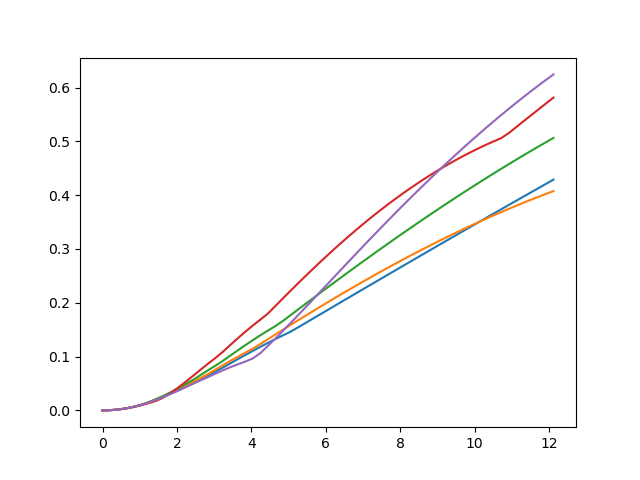

In [42]:
for m in max_pressure:
    plt.plot(A,m)

In [43]:
max_pressure

array([[8.88178420e-15, 3.87875603e-04, 1.52132101e-03, 3.47830753e-03,
        6.39816417e-03, 9.94853095e-03, 1.42179754e-02, 1.91342275e-02,
        2.45924559e-02, 3.05632618e-02, 3.68638979e-02, 4.35517894e-02,
        5.03457581e-02, 5.76934314e-02, 6.49021162e-02, 7.18864556e-02,
        7.94983650e-02, 8.74454153e-02, 9.53097309e-02, 1.03062128e-01,
        1.10679244e-01, 1.18142283e-01, 1.25436037e-01, 1.32548124e-01,
        1.39468402e-01, 1.46188533e-01, 1.54149054e-01, 1.62376884e-01,
        1.70602019e-01, 1.78823041e-01, 1.87038825e-01, 1.95248472e-01,
        2.03451245e-01, 2.11646532e-01, 2.19833812e-01, 2.28012633e-01,
        2.36182593e-01, 2.44343328e-01, 2.52494505e-01, 2.60635808e-01,
        2.68766941e-01, 2.76887618e-01, 2.84997561e-01, 2.93096501e-01,
        3.01184173e-01, 3.09260318e-01, 3.17324678e-01, 3.25376999e-01,
        3.33417028e-01, 3.41444517e-01, 3.49459215e-01, 3.57460877e-01,
        3.65449255e-01, 3.73424107e-01, 3.81385187e-01, 3.893322